# Suppervised Learning: Prediction

## Linear Regression

We are going to use numpy, pandas and sklearn

In [1]:
import numpy as np
import pandas as pd
import sklearn

### Machine Learning Work Process
#### Let's remember the process when working with Machine Learning

1. Problem statement.
2. Data acquisition.
3. Data organization and cleaning.
4. Exploratory data analysis.
5. Interpretation.
6. Model creation.
---


---

1. In this exercise, we are going to predict a house loan to buy a house.

2. Let's get our data from [this link](https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval#:~:text=file_download-,Download%20(13%20kB))

### Data Organization and Cleanning

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('loan_sanction_train.csv')

FileNotFoundError: ignored

In [4]:
df

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
 df.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

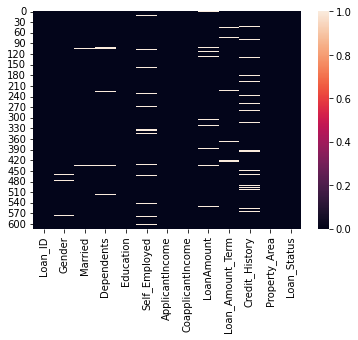

In [ ]:
sns.heatmap( df.isna() )

We can see that there is missing information. So we have to decide:


* Remove missing data - we can lose valuable information
* Fill in missing data - we can bias the information.

&nbsp;
&nbsp;
 

---

&nbsp;&nbsp;

 

If we decide to fill in the data, we also have options:


*   Complete with average - Possible bias of information
* Complete with nearby values - Possible noise or incorrect data.
* Complete with significant values (-1, -999) - Possible creation of outliers
* Complete with most frequent value - Possible noise or incorrect data.



#### Filling in categorical values

Categorical values are those that present only non-numeric values. These can be eliminated or replaced by the most frequent value.

We are interested in evaluating how many categorical values we are missing to decide whether to eliminate or fill them.

In [ ]:
df.info() # revisamos los valores no númericos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.select_dtypes('object') # filtramos solo los valores no númericos

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In this case, we are interested in knowing what the most frequent value is, so we use the value counts function to count them.

In [ ]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

As this returns key value pairs, we can convert it into a dictionary

In [ ]:
df['Married'].value_counts().to_dict()

{'Yes': 398, 'No': 213}

In [ ]:
df['Married'].value_counts().to_dict().keys()

dict_keys(['Yes', 'No'])

If we iterate over the dictionary, we can also transform the data to show us the percentage of total values

In [ ]:
count = df['Married'].value_counts().to_dict()

for key in count.keys():
  print( key, count[key] / len( df['Married'] ) )

Yes 0.6482084690553745
No 0.3469055374592834


Using the previous data, we can calculate which columns have the most information to replace our missing data.

In [ ]:
for col in df.select_dtypes('object').columns: 

  na = df[col].isna().value_counts().to_dict() # obtenemos los valores faltantes

  if True in na: # solo nos ineresa los que faltan

    print(col, na[True], f'{na[True] / len( df[col] ) * 100}%') # columna que le falta, cuantos valores, y porcentaje

    # ahora buscamos el valor más frecuente

    count = df[col].value_counts().to_dict()

    for key in count.keys():
      print( key, count[key] / len( df[col] ) )
    print('------------------------------------------')

Gender 13 2.1172638436482085%
Male 0.7964169381107492
Female 0.18241042345276873
------------------------------------------
Married 3 0.4885993485342019%
Yes 0.6482084690553745
No 0.3469055374592834
------------------------------------------
Dependents 15 2.44299674267101%
0 0.5618892508143323
1 0.16612377850162866
2 0.16449511400651465
3+ 0.08306188925081433
------------------------------------------
Self_Employed 32 5.211726384364821%
No 0.8143322475570033
Yes 0.13355048859934854
------------------------------------------


As we can see, most of the missing data has less than 5% of total values, that can lead to savefull replacement of data

In [ ]:
import numpy as np

In [ ]:
for col in df.select_dtypes('object').columns: 

  na = df[col].isna().value_counts().to_dict() # obtenemos los valores faltantes

  if True in na: # solo nos ineresa los que faltan
    df[col] = df[col].apply(lambda x: list( df[col].value_counts().to_dict().keys() )[0] if x is np.nan else x)

<AxesSubplot:>

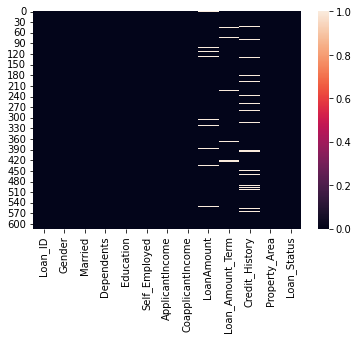

In [ ]:
sns.heatmap( df.isna() )

#### Filling numerical values

To fill numerical values we redo the same proccess as with the categorical ones.

In [ ]:
df.info() # revisamos los valores no númericos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.select_dtypes('float64') # filtramos solo los valores no númericos

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,NaN,360.0,1.0
1,1508.0,128.0,360.0,1.0
2,0.0,66.0,360.0,1.0
3,2358.0,120.0,360.0,1.0
4,0.0,141.0,360.0,1.0
...,...,...,...,...
609,0.0,71.0,360.0,1.0
610,0.0,40.0,180.0,1.0
611,240.0,253.0,360.0,1.0
612,0.0,187.0,360.0,1.0


In [ ]:
for col in df.select_dtypes('float64').columns: 

  na = df[col].isna().value_counts().to_dict() # obtenemos los valores faltantes

  if True in na: # solo nos ineresa los que faltan

    print(col, na[True], f'{na[True] / len( df[col] ) * 100}%') # columna que le falta, cuantos valores, y porcentaje

    print( f'valor a rellenar: {df[col].mean()}, {df[col].std()}' )
    print('------------------------------------------')

LoanAmount 22 3.5830618892508146%
valor a rellenar: 146.41216216216216, 85.58732523570545
------------------------------------------
Loan_Amount_Term 14 2.2801302931596092%
valor a rellenar: 342.0, 65.12040985461256
------------------------------------------
Credit_History 50 8.143322475570033%
valor a rellenar: 0.8421985815602837, 0.3648783192364048
------------------------------------------


In [ ]:
for col in df.select_dtypes('float64').columns: 

  na = df[col].isna().value_counts().to_dict() # obtenemos los valores faltantes

  if True in na: # solo nos ineresa los que faltan
    df[col] = df[col].apply(lambda x: df[col].mean() if np.isnan(x) else x)

<AxesSubplot:>

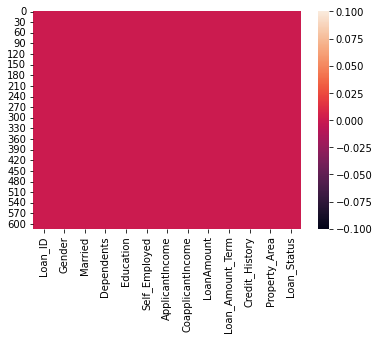

In [ ]:
sns.heatmap( df.isna() )

In [ ]:
df.to_csv('filled.csv')

We can get rid of unnecessary columns.

In [ ]:
df.drop(['Loan_ID', 'Loan_Status'], axis=1, inplace=True)

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban


Let’s convert categorical variables into binary data to work better with them. For that, we use the get_dummies function.

The advantage of doing this is that we can convert it into dichotomous variables and create a binary relationship with the result variable.

In [ ]:
pd.get_dummies(df)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.000000,180.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


### Exploratory Data Analysis

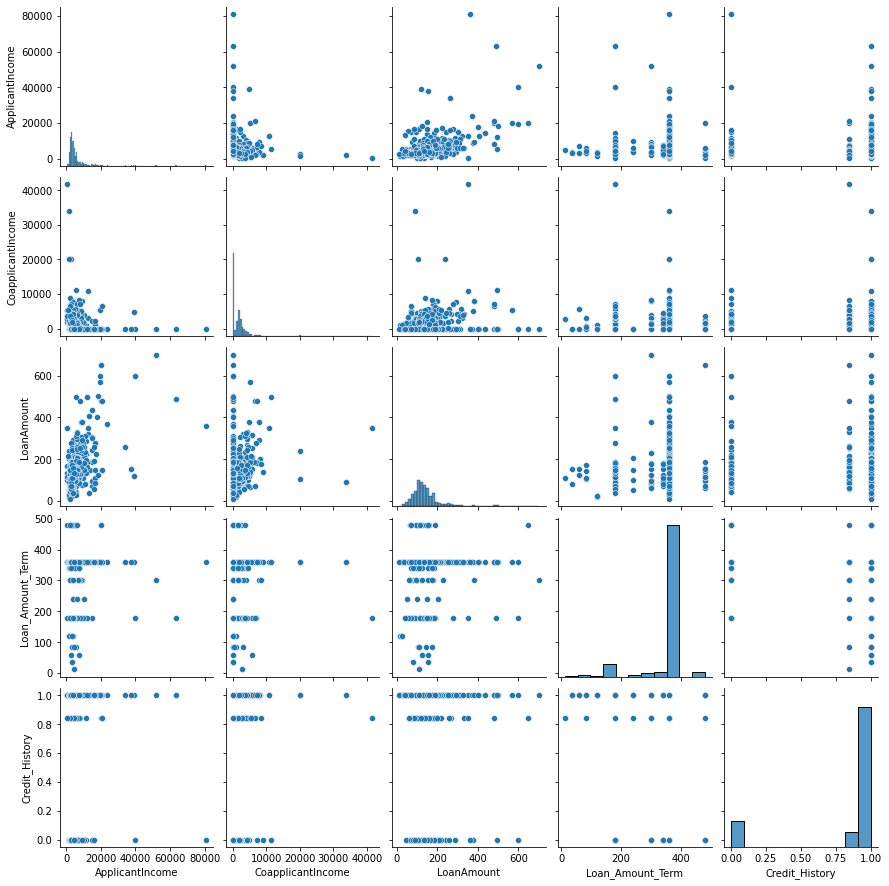

In [ ]:
sns.pairplot(df)

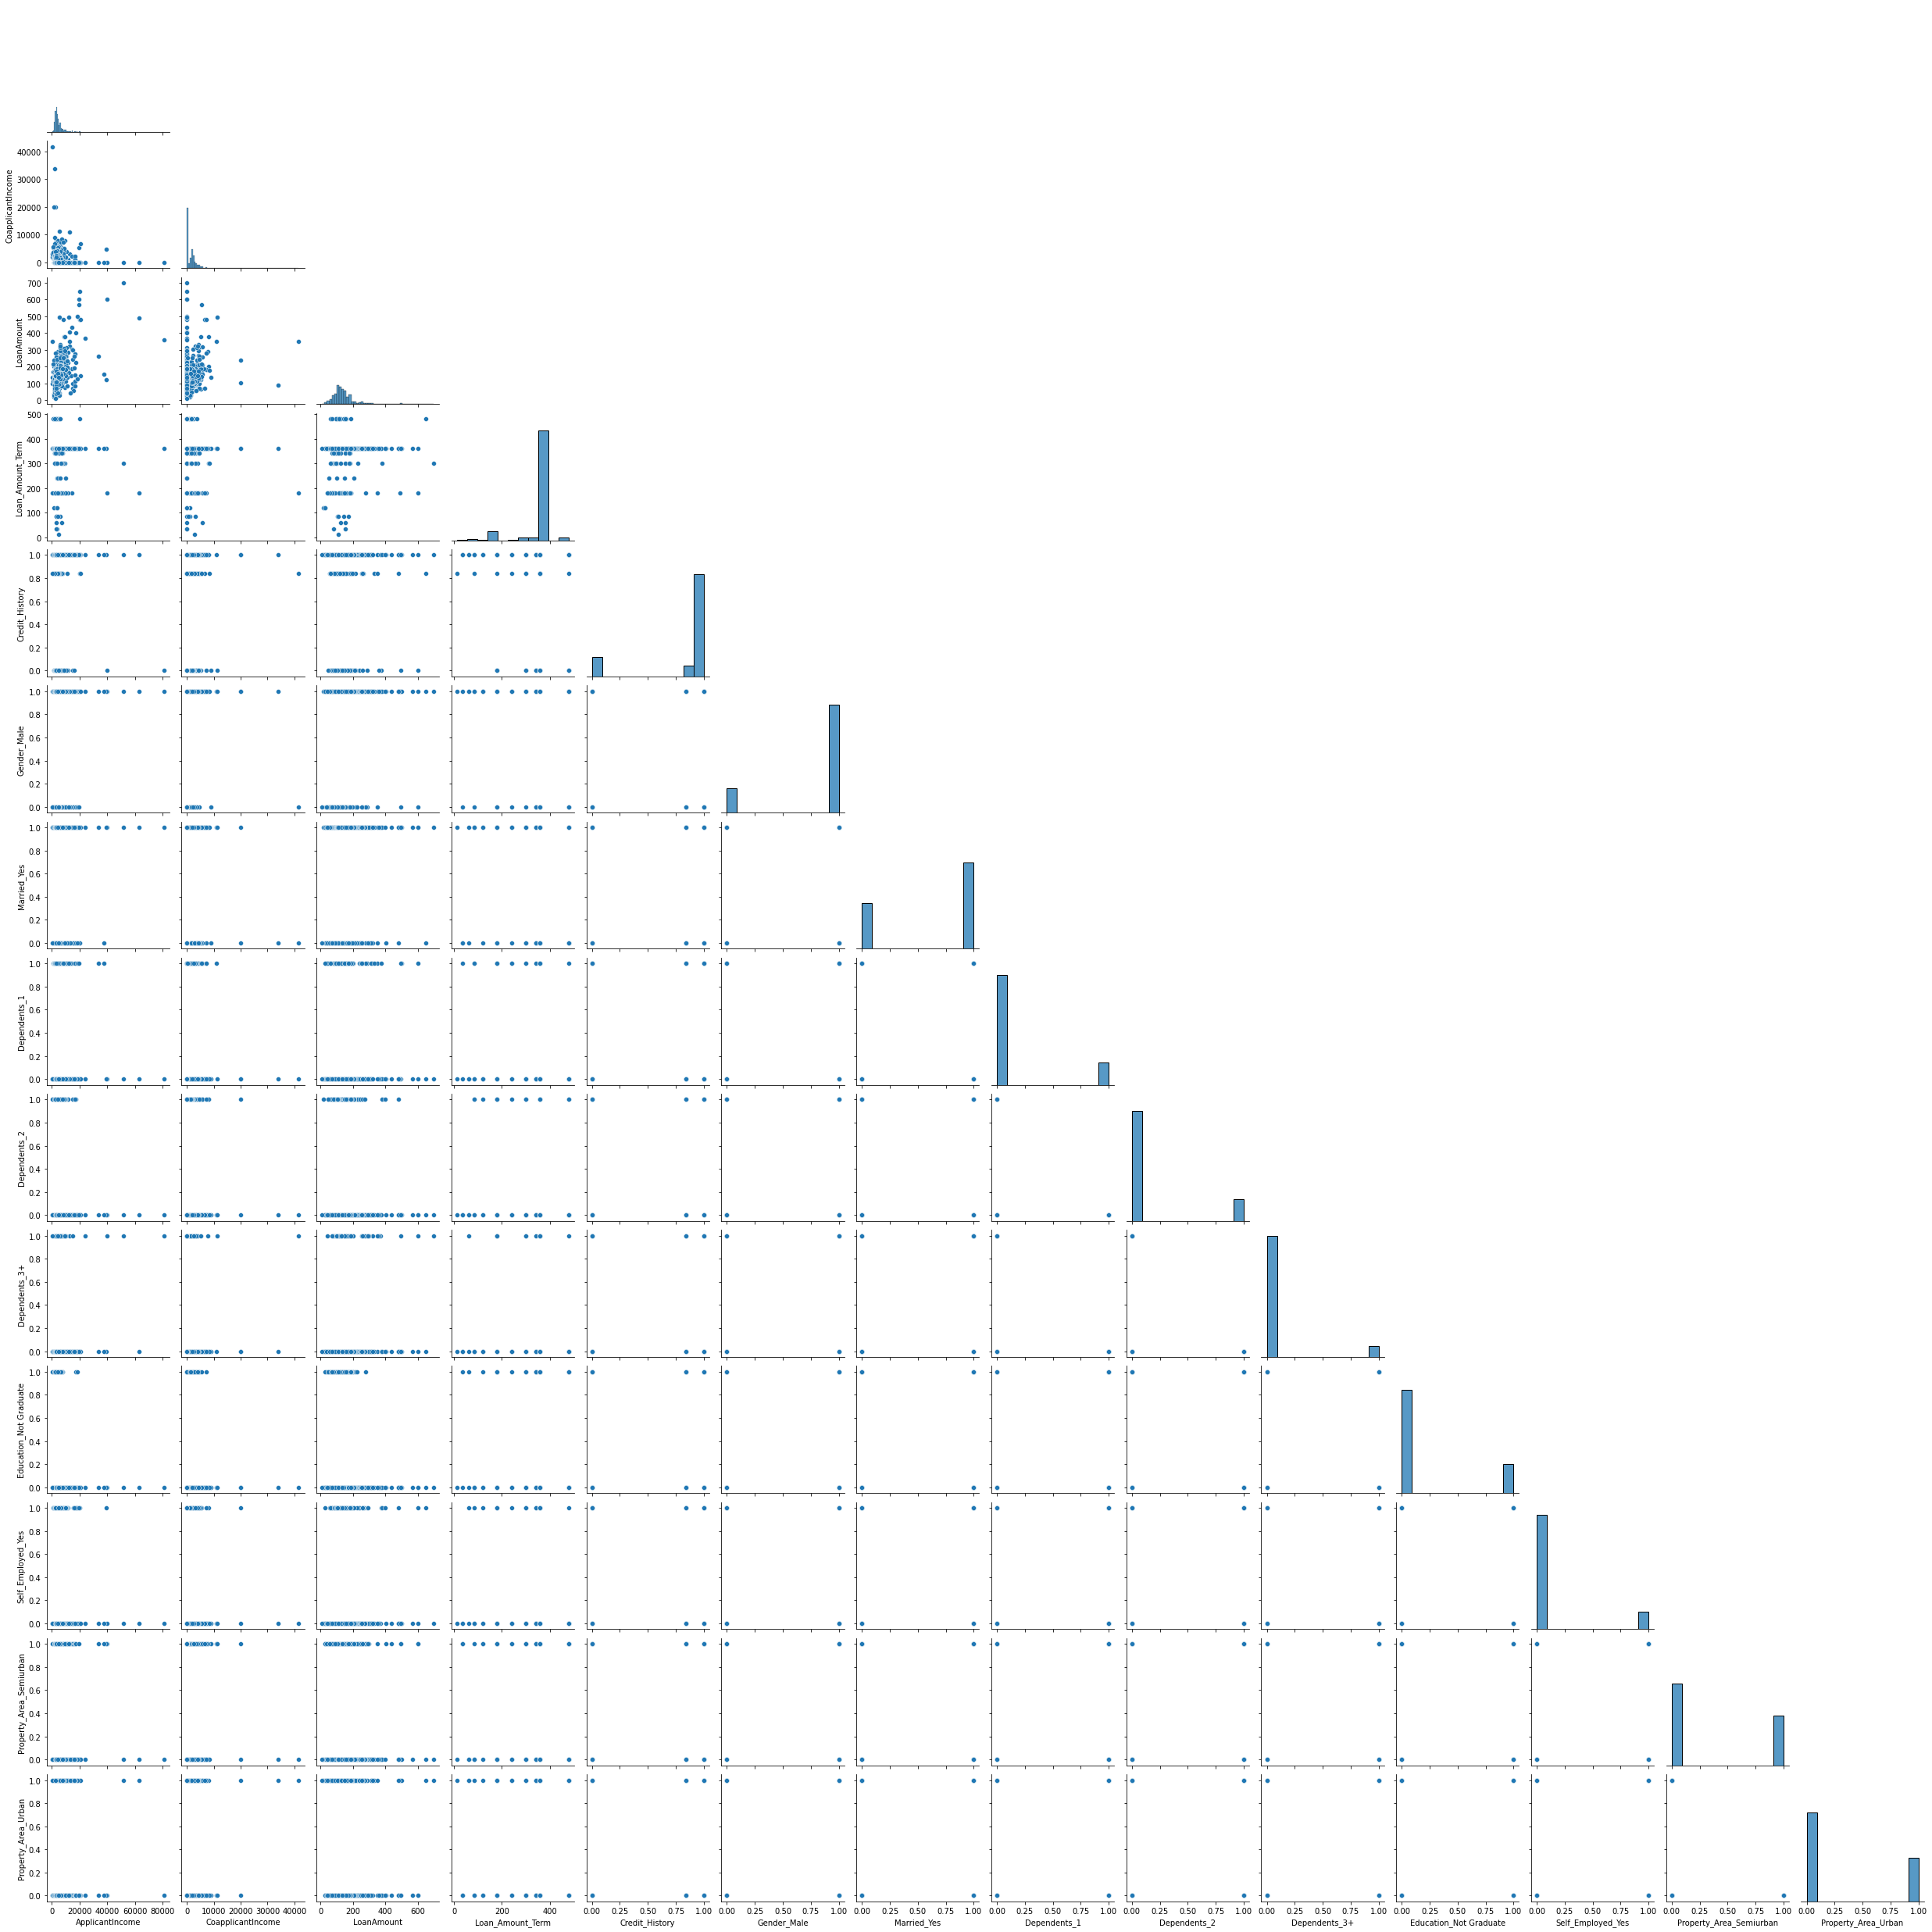

In [ ]:
sns.pairplot(pd.get_dummies(df, drop_first=True), corner=True)

Let's look for linear correlations

<AxesSubplot:>

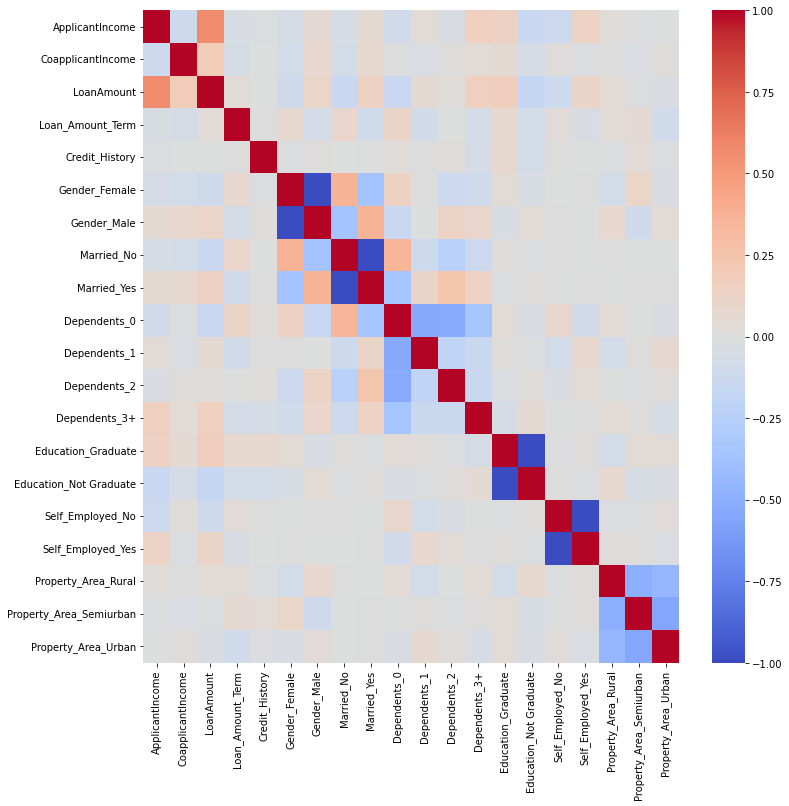

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(pd.get_dummies(df).corr(), vmin=-1, vmax=1, cmap='coolwarm')

We can appreciate that certain values influence the variable we want to explain: Credit Loan. 

Depending on the color of the value, we can observe a bias towards who would be given a loan

Once we have the exploratory data analysis and a greater understanding of the phenomenon we want to understand, what matters to us is being able to create models.

We load LinearRegression and also train test split.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
dfd = pd.get_dummies(df, drop_first=True) # nos interesa tener a las variables categoricas separadas

In [ ]:
dfd.to_csv('transformed.csv')

In [ ]:
dfd

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,0,0,1


Next step is to adjust to the model

In [ ]:
lr = LinearRegression()

#### Creating data subsets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfd.drop('LoanAmount', axis=1), dfd['LoanAmount'], test_size=.3, random_state=101)

#### Trainning the model

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

#### Evaluating the model

In [ ]:
lr.score(X_test, y_test)

0.4816721153675282

## Decision Tree

We will now try this regression exercise with a decision tree.

We have all the preprocessing work already done, so we will only focus on creating the model.

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [ ]:
dt = DecisionTreeRegressor(max_depth=4)

#### Data subsets
Let's use the same data as before

#### Model Trainning

In [ ]:
dt.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=4)

#### Plotting the Tree

[Text(0.5648148148148148, 0.9, 'x[0] <= 5705.5\nsquared_error = 6423.553\nsamples = 185\nvalue = 143.956'),
 Text(0.2962962962962963, 0.7, 'x[0] <= 3908.5\nsquared_error = 1487.636\nsamples = 135\nvalue = 115.66'),
 Text(0.14814814814814814, 0.5, 'x[1] <= 1666.5\nsquared_error = 1228.149\nsamples = 85\nvalue = 103.866'),
 Text(0.07407407407407407, 0.3, 'x[0] <= 3366.0\nsquared_error = 1064.775\nsamples = 45\nvalue = 86.516'),
 Text(0.037037037037037035, 0.1, 'squared_error = 977.54\nsamples = 29\nvalue = 76.181'),
 Text(0.1111111111111111, 0.1, 'squared_error = 678.312\nsamples = 16\nvalue = 105.25'),
 Text(0.2222222222222222, 0.3, 'x[1] <= 7386.0\nsquared_error = 692.305\nsamples = 40\nvalue = 123.385'),
 Text(0.18518518518518517, 0.1, 'squared_error = 555.689\nsamples = 39\nvalue = 121.421'),
 Text(0.25925925925925924, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 200.0'),
 Text(0.4444444444444444, 0.5, 'x[1] <= 1440.5\nsquared_error = 1290.383\nsamples = 50\nvalue = 135.708'),
 Te

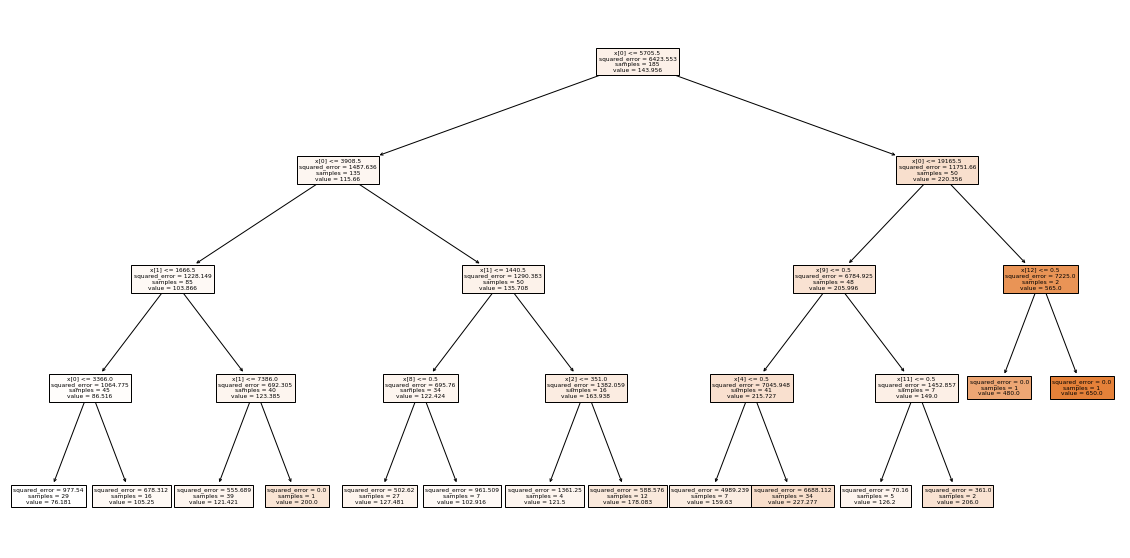

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True)

#### Model evaluation

In [ ]:
dt.score(X_test, y_test)

0.6995213376130902

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#### Data Subset
Same as before

#### Model Trainning

In [ ]:
rf = RandomForestRegressor(max_depth=4)

In [ ]:
rf.fit(X_test, y_test)

RandomForestRegressor(max_depth=4)

#### Tree Plotting
We can also plot a tree from the forest

[Text(0.5869565217391305, 0.9, 'x[0] <= 13922.5\nsquared_error = 5118.757\nsamples = 112\nvalue = 138.196'),
 Text(0.34782608695652173, 0.7, 'x[0] <= 5705.5\nsquared_error = 3054.748\nsamples = 108\nvalue = 130.884'),
 Text(0.17391304347826086, 0.5, 'x[1] <= 1720.5\nsquared_error = 1963.572\nsamples = 82\nvalue = 114.568'),
 Text(0.08695652173913043, 0.3, 'x[0] <= 2386.5\nsquared_error = 1432.1\nsamples = 50\nvalue = 96.247'),
 Text(0.043478260869565216, 0.1, 'squared_error = 1127.845\nsamples = 11\nvalue = 58.495'),
 Text(0.13043478260869565, 0.1, 'squared_error = 964.42\nsamples = 39\nvalue = 107.632'),
 Text(0.2608695652173913, 0.3, 'x[0] <= 3977.0\nsquared_error = 1486.904\nsamples = 32\nvalue = 142.389'),
 Text(0.21739130434782608, 0.1, 'squared_error = 928.479\nsamples = 23\nvalue = 130.297'),
 Text(0.30434782608695654, 0.1, 'squared_error = 1691.502\nsamples = 9\nvalue = 168.706'),
 Text(0.5217391304347826, 0.5, 'x[1] <= 563.0\nsquared_error = 3000.771\nsamples = 26\nvalue = 182

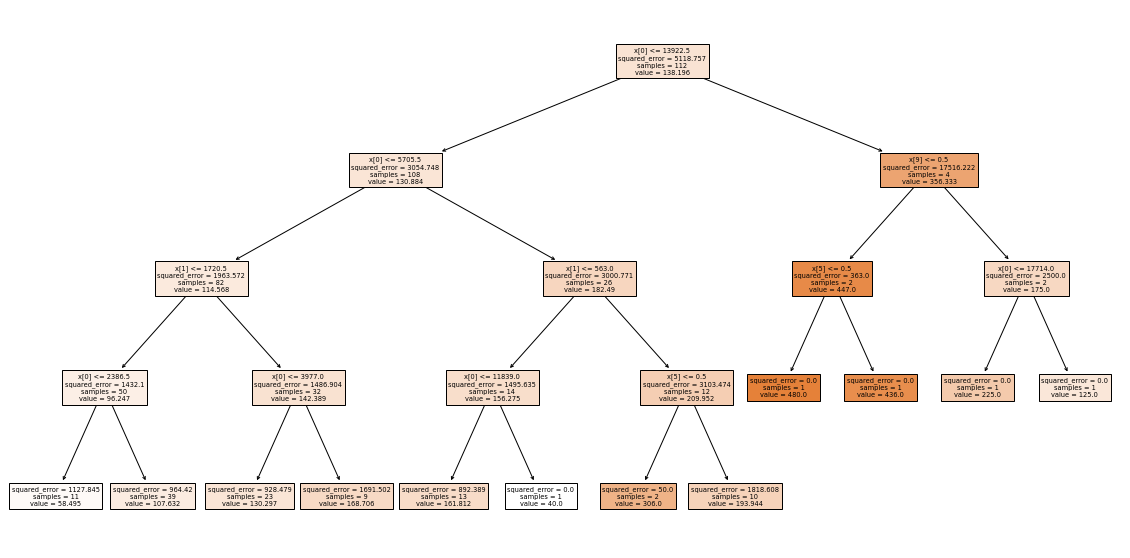

In [ ]:
plt.figure(figsize=(20,10))
plot_tree( rf.estimators_[0], filled=True)

#### Model Evaluation

In [ ]:
rf.score(X_test, y_test)

0.7642740676117723

# Supervised Learning: Classification

For this exercise we will use the same dataset as before, with the only difference in the value to predict.

In [ ]:
df = pd.read_csv('filled.csv', index_col=0)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


## Logistic Regression

### Data Cleanning

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.drop(['Loan_ID'], axis=1, inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [ ]:
dfd = pd.get_dummies(df, drop_first=True)
dfd

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,0,0,1,1


### Data subsets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( dfd.drop(['Loan_Status_Y'], axis=1) , dfd['Loan_Status_Y'])

### Model Trainning

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

### Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred = lr.predict(X_test)

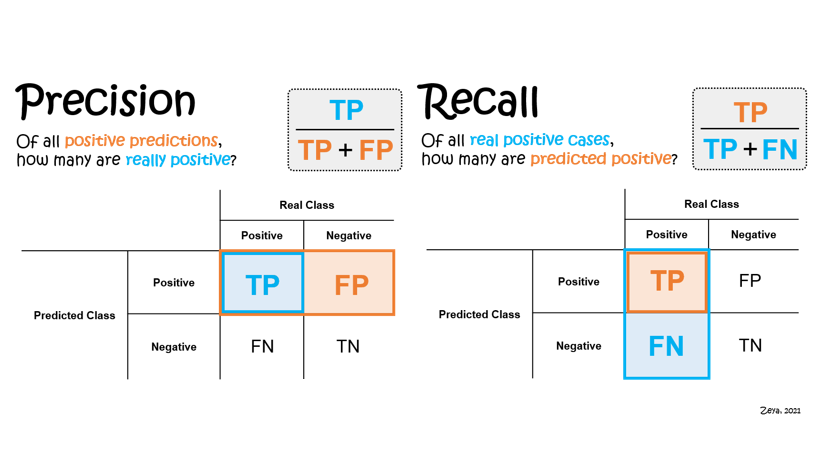

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 17,  30],
       [  4, 103]])

In [ ]:
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.81      0.36      0.50        47
           1       0.77      0.96      0.86       107

    accuracy                           0.78       154
   macro avg       0.79      0.66      0.68       154
weighted avg       0.79      0.78      0.75       154



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### Model Trainning

In [ ]:
dtc = DecisionTreeClassifier(max_depth=4)

In [ ]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

### Plotting Tree

[Text(0.5625, 0.9, 'x[4] <= 0.421\ngini = 0.432\nsamples = 460\nvalue = [145, 315]'),
 Text(0.3125, 0.7, 'x[2] <= 547.5\ngini = 0.157\nsamples = 70\nvalue = [64, 6]'),
 Text(0.25, 0.5, 'x[1] <= 8115.0\ngini = 0.134\nsamples = 69\nvalue = [64, 5]'),
 Text(0.125, 0.3, 'x[0] <= 4836.0\ngini = 0.112\nsamples = 67\nvalue = [63, 4]'),
 Text(0.0625, 0.1, 'gini = 0.043\nsamples = 46\nvalue = [45, 1]'),
 Text(0.1875, 0.1, 'gini = 0.245\nsamples = 21\nvalue = [18, 3]'),
 Text(0.375, 0.3, 'x[2] <= 316.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4375, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8125, 0.7, 'x[1] <= 9650.5\ngini = 0.329\nsamples = 390\nvalue = [81, 309]'),
 Text(0.75, 0.5, 'x[12] <= 0.5\ngini = 0.322\nsamples = 387\nvalue = [78, 309]'),
 Text(0.625, 0.3, 'x[1] <= 612.0\ngini = 0.378\nsamples = 229\nvalue = [58, 171]'),
 Text(0.5625, 0.1,

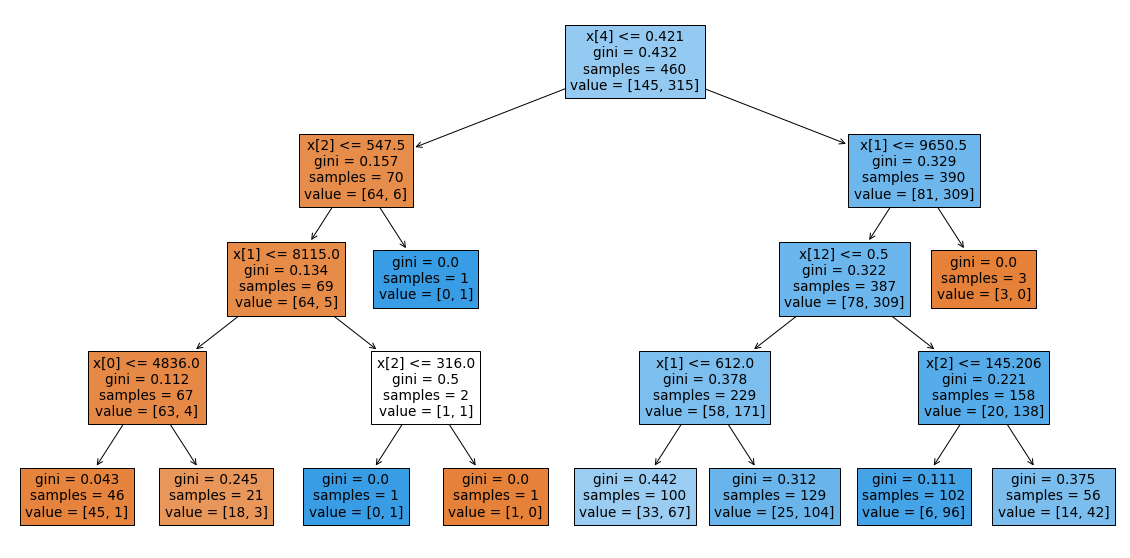

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True)

### Model Evaluation

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.90      0.40      0.56        47
           1       0.79      0.98      0.88       107

    accuracy                           0.81       154
   macro avg       0.85      0.69      0.72       154
weighted avg       0.82      0.81      0.78       154



In [ ]:
confusion_matrix(y_pred, y_test)

array([[ 18,   5],
       [ 22, 109]])

## Random Forest

### Model Trainning

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(max_depth=3)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

### Plotting Tree

[Text(0.5, 0.875, 'x[13] <= 0.5\ngini = 0.45\nsamples = 290\nvalue = [157, 303]'),
 Text(0.25, 0.625, 'x[1] <= 6458.0\ngini = 0.416\nsamples = 206\nvalue = [94, 224]'),
 Text(0.125, 0.375, 'x[12] <= 0.5\ngini = 0.407\nsamples = 201\nvalue = [88, 222]'),
 Text(0.0625, 0.125, 'gini = 0.48\nsamples = 79\nvalue = [48, 72]'),
 Text(0.1875, 0.125, 'gini = 0.332\nsamples = 122\nvalue = [40, 150]'),
 Text(0.375, 0.375, 'x[4] <= 0.921\ngini = 0.375\nsamples = 5\nvalue = [6, 2]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [6, 0]'),
 Text(0.75, 0.625, 'x[1] <= 350.0\ngini = 0.494\nsamples = 84\nvalue = [63, 79]'),
 Text(0.625, 0.375, 'x[10] <= 0.5\ngini = 0.486\nsamples = 41\nvalue = [38, 27]'),
 Text(0.5625, 0.125, 'gini = 0.497\nsamples = 32\nvalue = [27, 23]'),
 Text(0.6875, 0.125, 'gini = 0.391\nsamples = 9\nvalue = [11, 4]'),
 Text(0.875, 0.375, 'x[4] <= 0.421\ngini = 0.439\nsamples = 43\nvalue = [25, 52]'),
 Text(

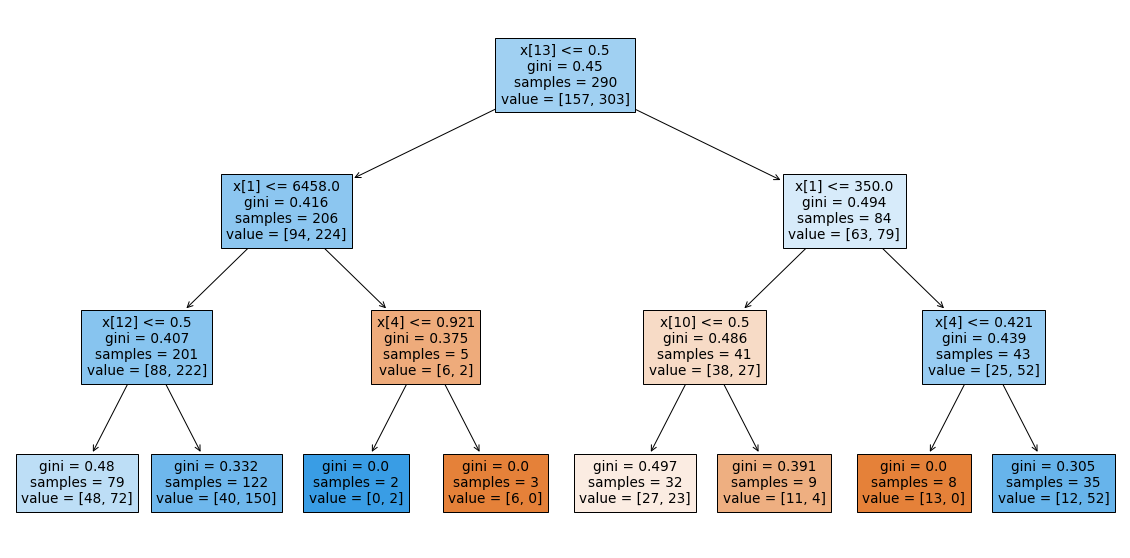

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(rfc.estimators_[0], filled=True)

### Model Evaluation

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.95      0.38      0.55        47
           1       0.79      0.99      0.88       107

    accuracy                           0.81       154
   macro avg       0.87      0.69      0.71       154
weighted avg       0.83      0.81      0.78       154



In [ ]:
confusion_matrix( y_test, y_pred )

array([[ 18,  22],
       [  4, 110]])

## Support Vector Machines

### Model Trainning

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(decision_function_shape='ovo')

In [ ]:
svm.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

### Model Evaluation

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.74      1.00      0.85       114

    accuracy                           0.74       154
   macro avg       0.37      0.50      0.43       154
weighted avg       0.55      0.74      0.63       154



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test,y_pred)

array([[  0,  40],
       [  0, 114]])